### Imports and setup

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [86]:
sns.set_style("darkgrid")

### Functions to plot

In [137]:
def getWordsInDecadeOrdered(decade):
    df = pd.DataFrame()
    years = 1900+decade
    for year in range(years, years+10):
        path_file = '..\data\wordCount'+str(year)+'.csv'
        df_year = pd.read_csv(path_file)
        df = pd.concat([df, df_year]).groupby(['index']).sum().reset_index()
    df.sort_values(by=['sum'], ascending = False, inplace=True)
    return df

In [143]:
def getAllWordsOrdered():
    df = pd.DataFrame()
    for year in range(1970, 2022):
        path_file = '..\data\wordCount'+str(year)+'.csv'
        df_year = pd.read_csv(path_file)
        df = pd.concat([df, df_year]).groupby(['index']).sum().reset_index()
    df.sort_values(by=['sum'], ascending = False, inplace=True)
    return df

In [139]:
def dropNonValueWords(df):
    lst = set(stopwords.words('english'))
    for word in lst:
        df.drop(df.loc[df['index']==word].index, inplace=True)
    return df

In [192]:
def plotBarAll(df):
    title = 'TOP 10 Words of all Time'
    plt.figure(figsize = (15,4))
    d = sns.barplot(data=df, x='index', y='sum', color='green')
    for g in d.patches:
        d.annotate(format(g.get_height(), '.0f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, -13),
                textcoords = 'offset points')
    d.axes.set_title(title,y=1.05, fontsize=25)
    d.set(xlabel='Words', ylabel='Word Count')
    plt.savefig('../images/barPlotAlltime.png', bbox_inches = 'tight')
    plt.show()

In [187]:
def plotBarDecade(df, decade):
    title = str(1900+decade)+'s Decade'
    plt.figure(figsize = (15,4))
    d = sns.barplot(data=df, x='index', y='sum', color='cyan')
    for g in d.patches:
        d.annotate(format(g.get_height(), '.0f'),
                (g.get_x() + g.get_width() / 2., g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, -13),
                textcoords = 'offset points')
    d.axes.set_title(title,y=1.05, fontsize=25)
    d.set(xlabel='Top 10 Words', ylabel='Word Count')
    path = '../images/barplotdecade'+ str(1900+decade) +'.png'
    plt.savefig(path, bbox_inches = 'tight')
    plt.show()

In [189]:
def plotWordCloud(df, title):
    d = {}
    for i in range(100):
        d[df.iloc[i]['index']] = df.iloc[i]['sum']

    wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d)

    plt.figure(figsize = (12,12))
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('../images/wordCloudAlltime.png', bbox_inches = 'tight')
    plt.show()  

## Evolution of most used words by decade

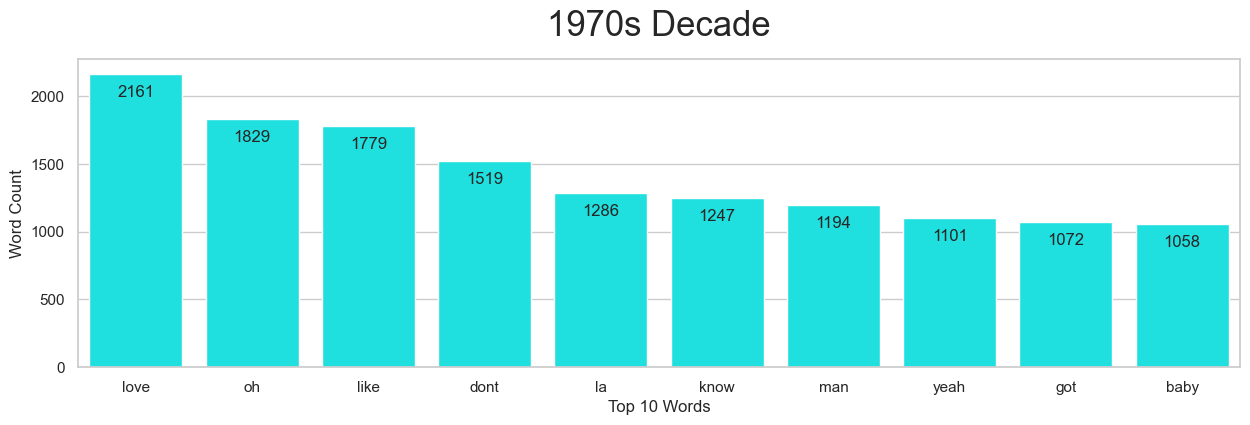

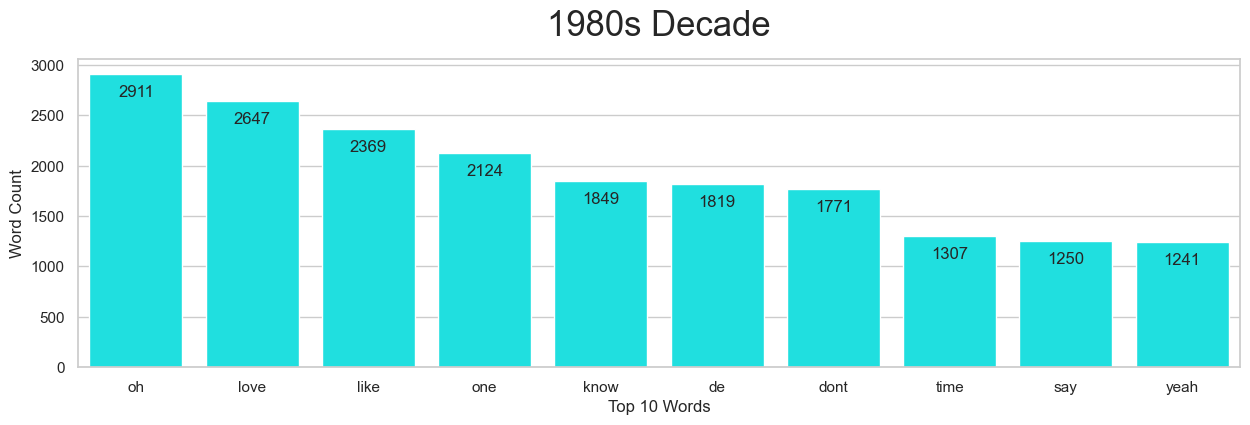

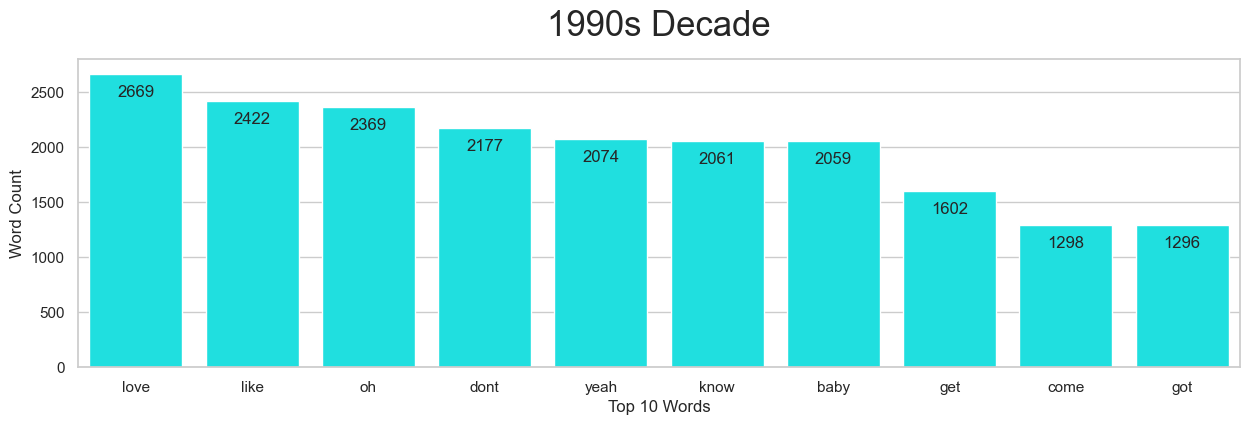

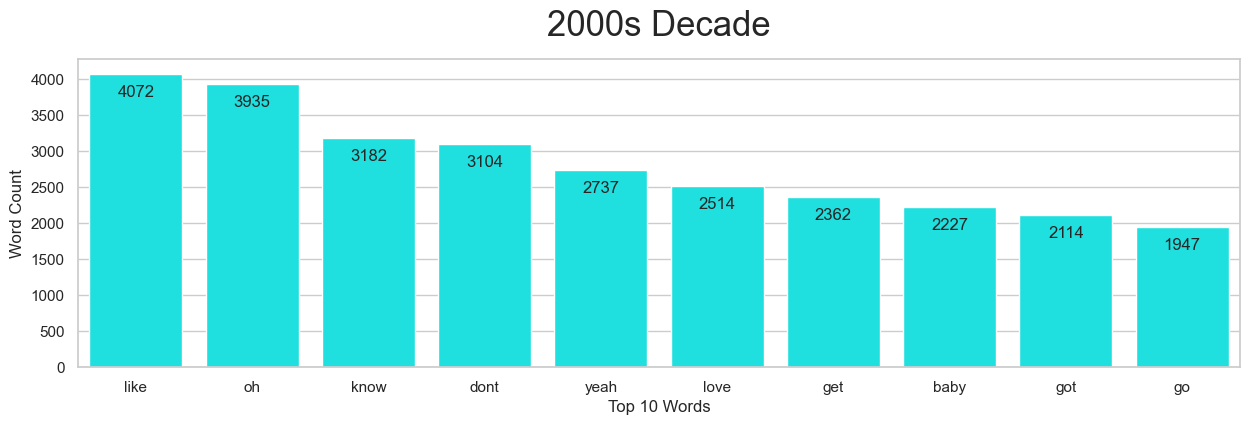

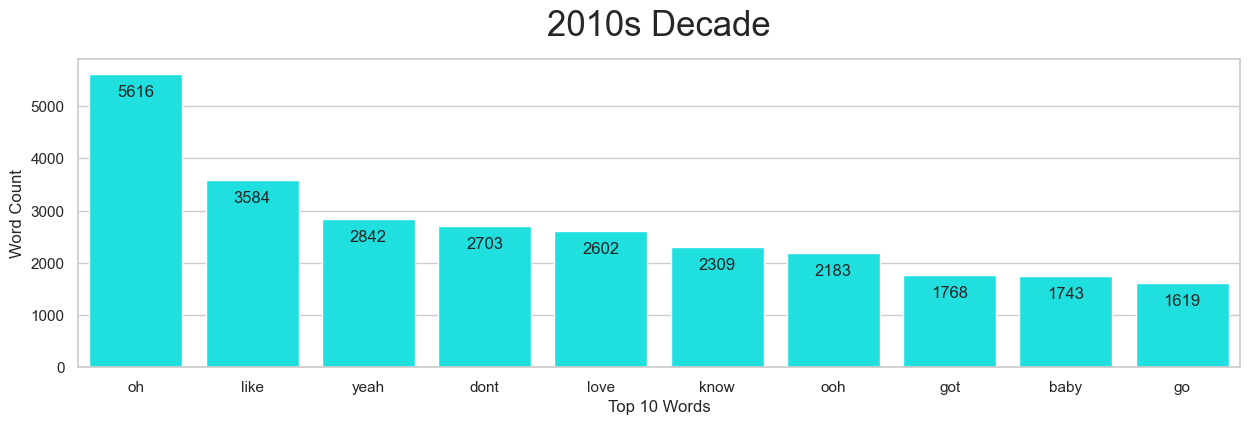

In [188]:
for decade in range(70, 111, 10):
    df_decade = getWordsInDecadeOrdered(decade)
    df_decade = dropNonValueWords(df_decade)
    df_decade = df_decade.nlargest(10, 'sum')
    plotBarDecade(df_decade, decade)

### TOP 10 Most used words

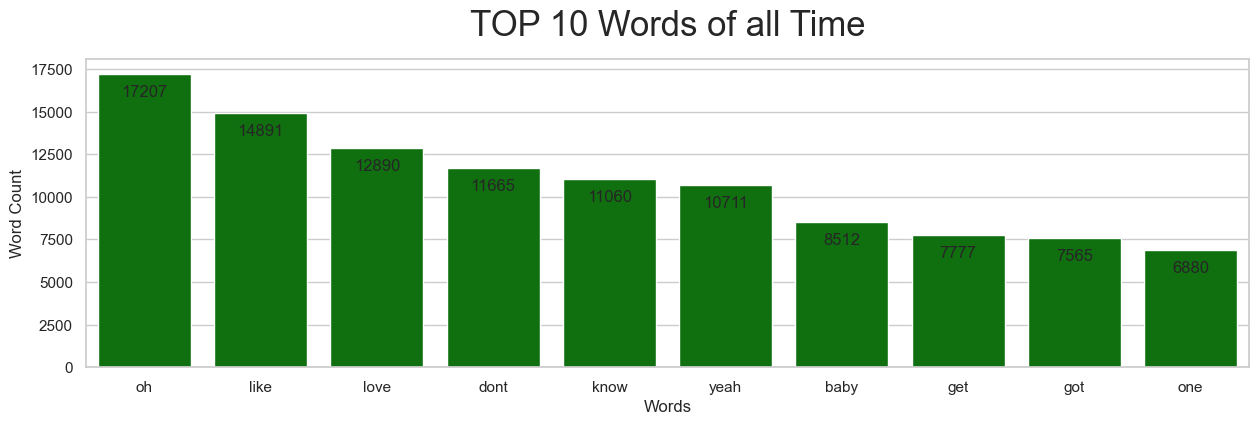

In [193]:
total_df = getAllWordsOrdered()
total_df = dropNonValueWords(total_df)
total_df = total_df.nlargest(10, 'sum')
plotBarAll(total_df)

### CloudMap of word frequency

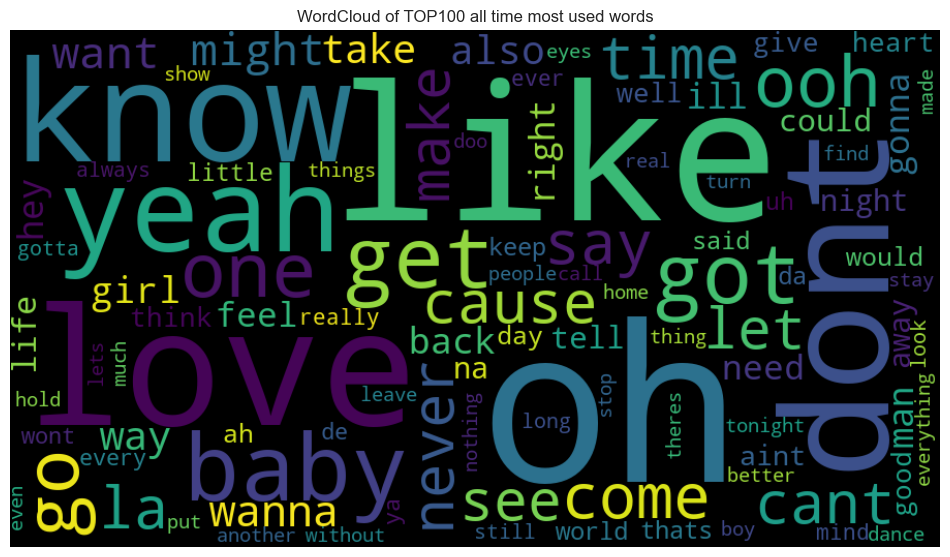

In [191]:
total_df = getAllWordsOrdered()
total_df = dropNonValueWords(total_df)
total_df = total_df.nlargest(100, 'sum')
plotWordCloud(total_df, "WordCloud of TOP100 all time most used words")